# Amazon Review of Movies and TV shows

In [1]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
import os
import sys

In [3]:
import json

Only Considering 1 milion rows for preprocessing first

In [4]:
# Define a generator function
def read_json_chunks(filename, chunksize):
    df_iterator = pd.read_json(filename, lines=True, chunksize=chunksize)
    for chunk in df_iterator:
        yield chunk

chunk_generator = read_json_chunks("Movies_and_TV.json", 1000000)

In [5]:
# 16 seconds for 1 million rows
first_chunk = next(chunk_generator)


In [6]:
first_chunk.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"03 11, 2013",A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},jacki,really happy they got evangelised .. spoiler a...,great,1362960000,NaN,NaN
1,5,True,"02 18, 2013",A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Ken P,Having lived in West New Guinea (Papua) during...,Realistic and Accurate,1361145600,3,NaN
2,5,False,"01 17, 2013",A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Reina Berumen,Excellent look into contextualizing the Gospel...,Peace Child,1358380800,NaN,NaN
3,5,True,"01 10, 2013",A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},N Coyle,"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,1357776000,NaN,NaN
4,4,True,"12 26, 2012",A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},Jodie Vesely,This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,1356480000,NaN,NaN


In [7]:
first_chunk.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [9]:
def get_relevant(raw_data,column_names):
    """
    raw_data: dataframe from JSOn
    column_names: list of column names to be extracted
    """
    interim_data =raw_data.loc[:,column_names]
    interim_data.dropna(inplace=True)
    return interim_data

In [10]:
processed = get_relevant(first_chunk,["reviewerID","asin","overall"])

In [14]:
processed["overall"].value_counts()

overall
5    668084
4    166584
3     72007
1     57033
2     36292
Name: count, dtype: int64

In [15]:
for i in range(8):
    temp_chunk = next(chunk_generator)
    temp_processed = get_relevant(temp_chunk,["reviewerID","asin","overall"])
    processed = pd.concat([processed,temp_processed],axis=0)

StopIteration: 

In [17]:
processed.to_csv("processed.csv",index=False)

In [18]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765568 entries, 0 to 8765567
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   reviewerID  object
 1   asin        object
 2   overall     int64 
dtypes: int64(1), object(2)
memory usage: 200.6+ MB


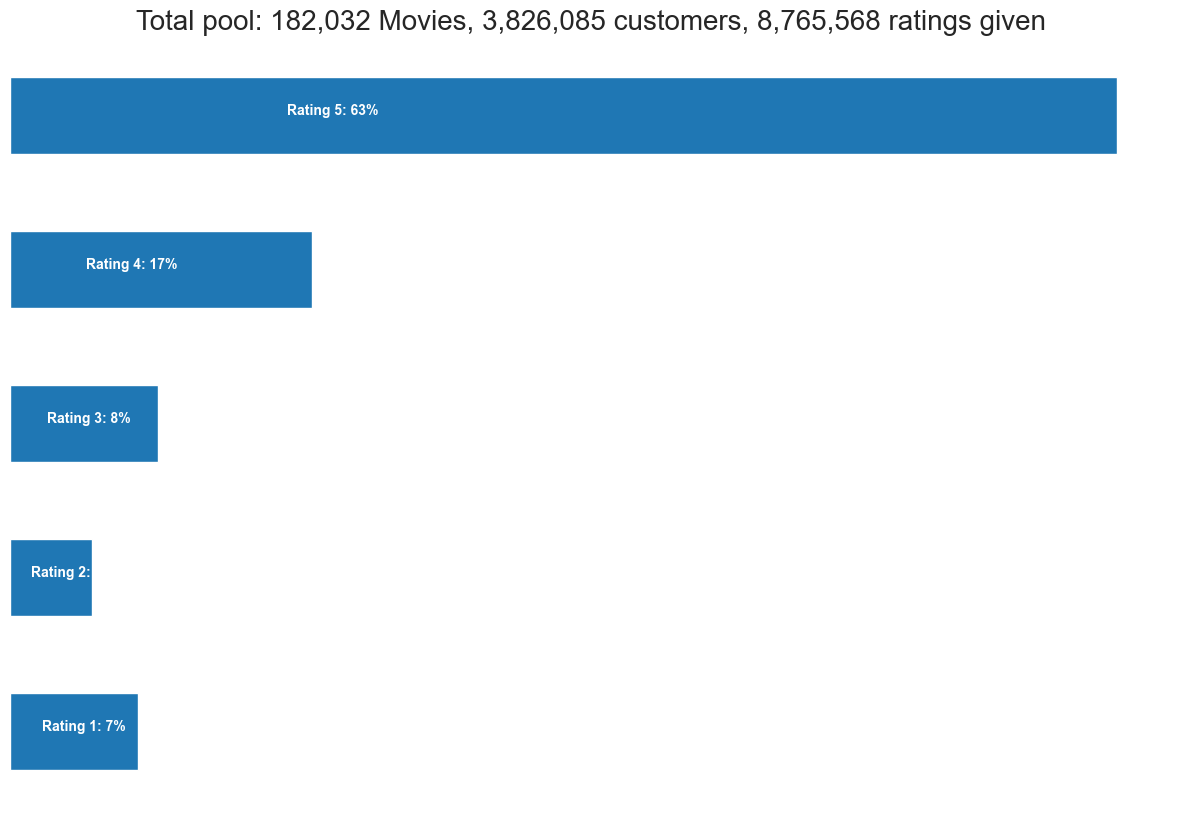

In [19]:
# 50 sec+
df=processed
p = df.groupby('overall')['overall'].agg(['count'])

# get movie count
movie_count = df["asin"].nunique()

# get customer count
cust_count = df['reviewerID'].nunique()

# get rating count
rating_count = len(df)

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')